<a href="https://colab.research.google.com/github/maicon-reis/indice_de_sharpe/blob/main/Por_Dentro_do_%C3%8Dndice_de_Sharpe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importanto a biblioteca para coletar dados financeiros
!pip install -q yfinance

     |████████████████████████████████| 6.3 MB 40.2 MB/s 


In [2]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import yfinance as yf

In [12]:
# Download do Preço de Fechamento Ajustado do ativo
dados = yf.download( "EQTL3.SA", start=dt.datetime(2012, 1, 1), end=dt.datetime.now() )['Adj Close']

[*********************100%***********************]  1 of 1 completed


## **Construindo o backtest com uma estratégia buy and hold**

In [13]:
# Indica se o trading está posicionado ou não
inpos = 0

# Manter o trading por 60 dias
periodoDoTrade = dt.timedelta(60)
espera         = 0

# Aqui colocamos o PnL
pnl          = []
pos          = []
tempoNoTrade = []


In [14]:
for data in dados.index:

    if inpos == 0 and espera == 2:
        precoEntrada = dados[data]
        abertura     = data
        inpos        = 1
    
    elif inpos == 1 and data - abertura >= periodoDoTrade:
        # Lucro/perda para este trade
        p = dados[data] - precoEntrada
        pnl.append(p)
        inpos = 0
    
    elif inpos == 0 and espera < 2:
        espera += 1

    pos.append(inpos)

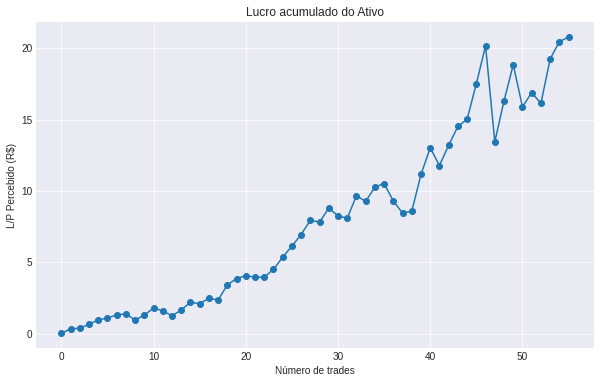

In [15]:
# Retorno cumulativo por trade
with plt.style.context("seaborn-dark"):
    fig = plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pnl), '-o')
    plt.title('Lucro acumulado do Ativo')
    plt.xlabel('Número de trades')
    plt.ylabel('L/P Percebido (R$)')
    plt.grid()
    plt.show()

### **Retornos diários**

In [16]:
# Retornos diários
pos1 = [0] + pos
retAtivo = dados.pct_change() * pos1[:-1]

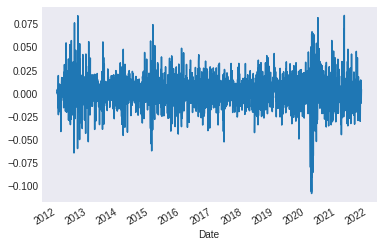

In [17]:
# Visualizando os gráfico de retronos diários
with plt.style.context("seaborn-dark"):
    retAtivo.plot()
    plt.show()

### **Índice de Sharpe**

In [18]:
# Sharpe ratio anualizado
taxaDeJuros = 0.0625
sharpe = (np.mean(retAtivo- (taxaDeJuros/365))/np.std(retAtivo))*np.sqrt(252)
sharpe

0.858316738043968

## **Lucro por Trade**

In [19]:
pnl_sort =  sorted(pnl)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support 'u' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.
/usr/lo

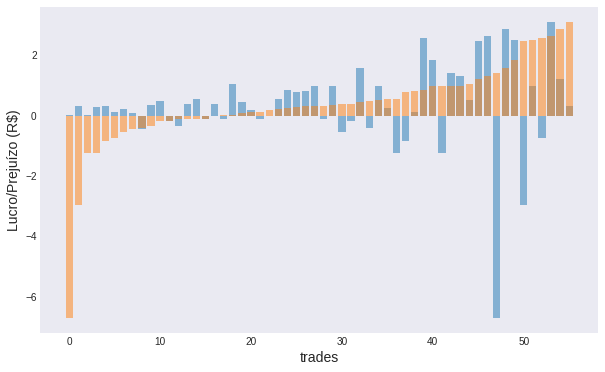

In [20]:
# Criando gráfico de lucro/prejuízo por trad
with plt.style.context("seaborn-dark"):
    fig = plt.figure(figsize=(10,6))
    x = range(len(pnl))
    plt.bar(x, pnl, alpha=0.5)
    plt.bar(x, pnl_sort, alpha=0.5)

    plt.ylabel('Lucro/Prejuízo (R$)', fontsize=14)
    plt.xlabel('trades', fontsize=14)
    plt.legend('lucro original por trade', 'lucro classificado por trade', fontsize=12)

    plt.show()

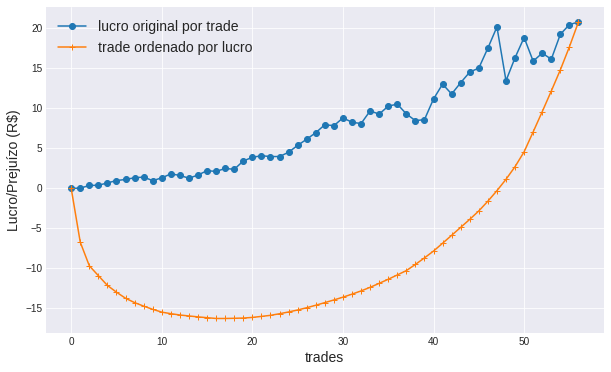

In [21]:
# Inserindo o mesmo ponto inicial para ambos eixos
pnl.insert(0, 0.0)
pnl_sort.insert(0, 0.0)

# Criando gráfico de lucro/prejuízo por trade
with plt.style.context("seaborn-dark"):
    fig = plt.figure(figsize=(10,6))

    plt.plot(np.cumsum(pnl), '-o')
    plt.plot(np.cumsum(pnl_sort), '-+')

    plt.legend(['lucro original por trade', 'trade ordenado por lucro'], fontsize=14)
    plt.ylabel('Lucro/Prejuízo (R$)', fontsize=14)
    plt.xlabel('trades', fontsize=14)

    plt.grid()
    plt.show()